In [21]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)

# Regresja liniowa

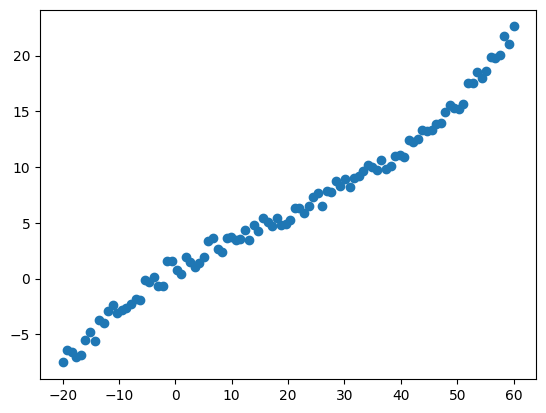

In [22]:
x = data[:, 0]
y = data[:, 1]

plt.scatter(x, y)

In [23]:
def h_fun(x, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: ndarray o wymiarze takim samym jak x, który zawiera wartości f. regresji liniowej dla podanych wag
    '''
    return theta_0 + x*theta_1

def calculate_cost(x, y, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: wartość funkcji kosztu dla podanych paramterów modelu
    '''
    return 0.5*np.mean(np.square(h_fun(x, theta_0, theta_1)-y))

In [24]:
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0

(0.006535873698070646, 0.31533227425813676, 0.6391773819923401)


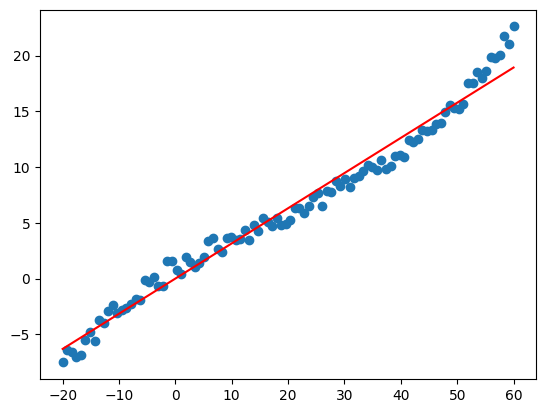

In [25]:
def cost_gradient(x, y, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: wartość gradientów funkcji kosztu dla podanych paramterów modelu
    '''
    theta_0_g = np.mean(h_fun(x, theta_0, theta_1) - y)
    theta_1_g = np.mean((h_fun(x, theta_0, theta_1) - y)*x)
    return (theta_0_g , theta_1_g)

def update_theta(x, y, theta_0, theta_1):
    (theta_0_g , theta_1_g) = cost_gradient(x, y, theta_0, theta_1)
    theta_0 -= alpha*theta_0_g
    theta_1 -= alpha*theta_1_g
    return (theta_0 , theta_1)
    
def get_line(x, y, theta_0 = 0, theta_1 = 0, eps = 1e-5, alpha = 0.001, Nmax = 10000):
    cost = 2*eps
    i = 0
    prev_cost = cost+20
    while(np.square(cost - prev_cost) > eps and i < Nmax):
        (theta_0 , theta_1) = update_theta(x, y, theta_0, theta_1)
        prev_cost = cost
        cost = calculate_cost(x, y, theta_0, theta_1)
        i += 1
    return (theta_0, theta_1, cost)

(theta_0, theta_1, cost) = get_line(x, y)
print((theta_0, theta_1, cost))

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, h_fun(x, theta_0, theta_1), 'r')

#### Regresja liniowa macierzowa

In [35]:
X = np.vstack([np.ones(x.shape), x])
y.shape = [1, -1]
print(X.shape)
print(y.shape)

(2, 100)
(1, 100)


(array([[0.00648763],
       [0.31538416]]), 1.2783553101740976)
(1, 100)


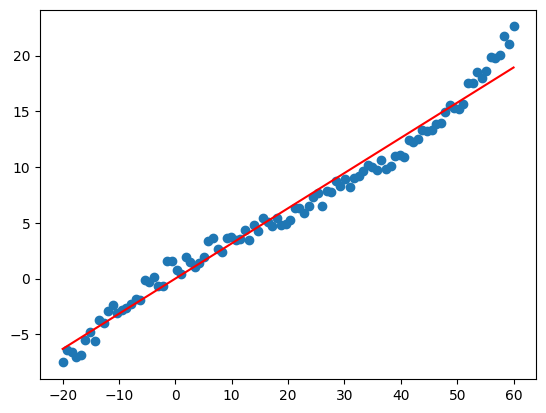

In [43]:
def h_fun(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: 
    '''
    return theta.T @ X # przykładowa realizacja, @ - mnożenie macierzowe

def calculate_cost(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    return np.mean(np.square(h_fun(X, theta) - y))/2

def cost_gradient(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    return (h_fun(X, theta) - y) @ X.T

def update_theta(x, y, theta):
    theta = theta - alpha * cost_gradient(X, y, theta)/X.shape[0]
    return theta

def get_line(X, y, theta = np.array([[0], [0]]), eps = 1e-5, alpha = 0.001, Nmax = 10000):
    cost = 2*eps
    i = 0
    prev_cost = cost+20
    m = y.shape[1]

    while(np.square(cost - prev_cost) > eps and i < Nmax):
        h_y_diff = (h_fun(X, theta) - y)
        prev_cost = cost
        cost = np.mean(np.square(h_y_diff))
        gradient = h_y_diff @ X.T
        theta = theta - alpha * gradient.T / m
        i += 1
    return (theta, cost)

(theta, cost) = get_line(X, y)
print((theta, cost))

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, h_fun(X, theta)[0, :], 'r')

In [48]:
with open('./housing.txt', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data2 = [row for row in csvreader]
    data2 = np.array(data2, dtype=np.float32)
    y = data2[:, 2]
    y.shape = [1, y.shape[0]]
    X = data2[:, 0:2]
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1).T

y_scale = y.max()
y = y / y_scale

X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale

theta = np.array([[0], [0], [0]])

(theta, cost) = get_line(X, y, theta)

example = np.array([[1], [1300], [4]])
h_example = theta.T @ (example/X_scale) * y_scale
print(f'koszt nieruchomosi o pow. {example[1][0]} z l. pok. {example[2][0]} oszacowany na {h_example[0][0]}')

koszt nieruchomosi o pow. 1300 z l. pok. 4 oszacowany na 1137.506965508875


#### Regresja wielomianowa

(1, 100)  = (1, 100)
(4, 100) = (4, 100)
(4, 1)  = (4, 1)
(1, 100)  = (1, 100)
(array([[0.14057516],
       [0.24900701],
       [0.16897762],
       [0.15007583]]), 0.02549639895813053)


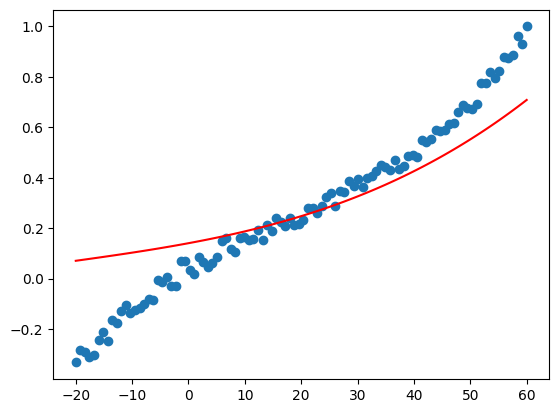

In [70]:
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)
x = data[:, 0]
y = data[:, 1]

X = np.vstack([np.ones(x.shape), x, x**2, x**3])

X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale
 
y.shape = [1, -1]
y_scale = y.max()
y = y / y_scale

eps = 1e-10
alpha = 1e-3
theta = np.array([[0], [0], [0], [0]])

print(y.shape, " = (1, 100)")
print(X.shape, "= (4, 100)")
print(theta.shape, " = (4, 1)")
print(h_fun(X, theta).shape, " = (1, 100)")

(theta, cost) = get_line(X, y, theta, eps, alpha)
print((theta, cost))
x.shape = [1, -1]

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x.T, (h_fun(X, theta)).T, 'r')